In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

In [2]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [3]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.001, Test: 0.004


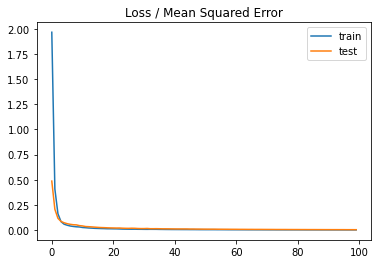

In [4]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [5]:
model2 = Sequential()
model2.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

history2 = model2.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_mse = model2.evaluate(trainX, trainy, verbose=0)
_, test_mse = model2.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.087, Test: 0.115


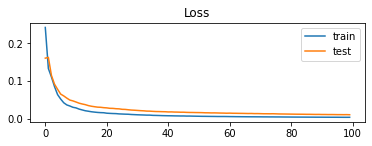

In [6]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()

In [8]:
model3 = Sequential()
model3.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

history3 = model3.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_mse = model3.evaluate(trainX, trainy, verbose=0)
_, test_mse = model3.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.002, Test: 0.001


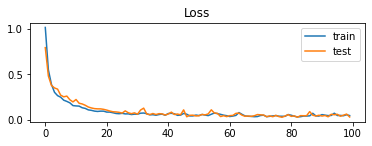

In [9]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history3.history['loss'], label='train')
pyplot.plot(history3.history['val_loss'], label='test')
pyplot.legend()